# The Jacobi Constant

Let's return now to the graph of the potential function, {numref}`fig:pseudo-potential-energy-cr3bp`. The potential function represents the **potential energy** that the tertiary mass will have if it is located at a given $x^*$-$y^*$ point in the orbital plane. The tertiary mass will also have some speed, $v^*$, with a corresponding **kinetic energy**.

From the law of conservation of energy, we know that the sum of the kinetic and potential energies of the tertiary mass will be constant. We will use the fact that energy is constant to determine what areas of space are accessible for the tertiary mass with a certain initial condition.

## Potential Energy

The potential energy is given in Eq. {eq}`eq:pseudo-potential-energy-cr3bp` and repeated here:

:::{math}
U(x^*, y^*) = -\frac{1 - \pi_2}{\sigma} - \frac{\pi_2}{\psi} - \frac{1}{2}\left[\left(1 - \pi_2\right)\sigma^2 + \pi_2 \psi^2\right]
:::

This equation has three terms:

1. The gravitational potential energy due to the position of $m$ relative to $m_2$
2. The gravitational potential energy due to the position of $m$ relative to $m_1$
3. The potential energy due to the centrifugal force induced by the rotation of the reference frame.

## Kinetic Energy

The mass-specific kinetic energy is:

:::{math}
:label: eq:mass-specific-ke-cr3bp
\frac{1}{2} \left(v^*\right)^2 = \frac{1}{2}\left[\left(\dot{x}^*\right)^2 + \left(\dot{y}^*\right)^2\right]
:::

Combining Eqs. {eq}`eq:pseudo-potential-energy-cr3bp` and {eq}`eq:mass-specific-ke-cr3bp`, we find from conservation of energy:

:::{math}
:label: eq:jacobi-constant-cr3bp
\frac{1}{2} \left(v^*\right)^2 - \frac{1 - \pi_2}{\sigma} - \frac{\pi_2}{\psi} - \frac{1}{2}\left[\left(1 - \pi_2\right)\sigma^2 + \pi_2 \psi^2\right] = J
:::

The constant $J$ is called the [**Jacobi Constant**](https://en.wikipedia.org/wiki/Jacobi_integral), and represents the total energy of the tertiary mass relative to the rotating reference frame.

## Interpreting the Jacobi Constant

Since $J$ is a constant, the total energy of the tertiary mass is fixed. The tertiary mass can trade kinetic energy for potential energy, and vice versa, but the total energy cannot change. This leads to two conclusions.

:::{margin}
Remember, this is the velocity relative to the rotating coordinate system, not the inertial velocity.
:::
Consider the tertiary mass at some location $\left(x^*_1, y^*_1\right)$ such that it has potential energy $U_1$. Also assume that the velocity is zero, $v^*_1 =$ 0. Then, the Jacobi constant is just equal to $U_1$, and the mass cannot "climb" any higher out of the potential energy surface. Thus, there is a region of space where the mass cannot access because it doesn't have enough energy!

Assume now that the velocity of the mass is $v^*_2$ and the position is $\left(x^*_2, y^*_2\right)$ so that the potential energy is $U_2$. Then the Jacobi constant is equal to the sum of the kinetic and potential energies. If the mass wants to climb up the potential energy surface, it can trade kinetic energy for potential energy. Eventually, however, the kinetic energy and the velocity will go to zero, and the mass cannot climb any higher!

## Forbidden Regions

:::{margin}
Koon et al. {cite}`Koon2011` also refer to the area where a particle cannot enter as the **Hill's region**.
:::

Now, let's turn this problem around. We want to know, for a given value of $J$, what regions of space will be inaccessible. Consider the tertiary mass with a certain value of $J$ and at a particular location. Since $J$ and the position are known, the velocity can be calculated from Eq. {eq}`eq:jacobi-constant-cr3bp`.

As the mass moves, it exchanges energy between kinetic energy (velocity) and potential energy (position). At some position, the $J$ will be equal to $U$, and the velocity will be (by definition) zero. Thus, the mass cannot travel any further in that direction.

For a given value of the Jacobi constant, we can calculate the contours of zero velocity positions by setting $v^* =$ 0 in Eq. {eq}`eq:jacobi-constant-cr3bp`:

:::{math}
:label: eq:jacobi-contours-zero-velocity
\frac{2 \left(1 - \pi_2\right)}{\sigma} + \frac{2 \pi_2}{\psi} + \left[\left(1 - \pi_2\right)\sigma^2 + \pi_2 \psi^2\right] + 2J = 0
:::

Since the first three terms on the left are all positive, zero velocity curves correspond to negative values of the Jacobi constant.

{numref}`fig:jacobi-forbidden-regions` plots the forbidden regions, shown as shaded areas, for several values of $J$.

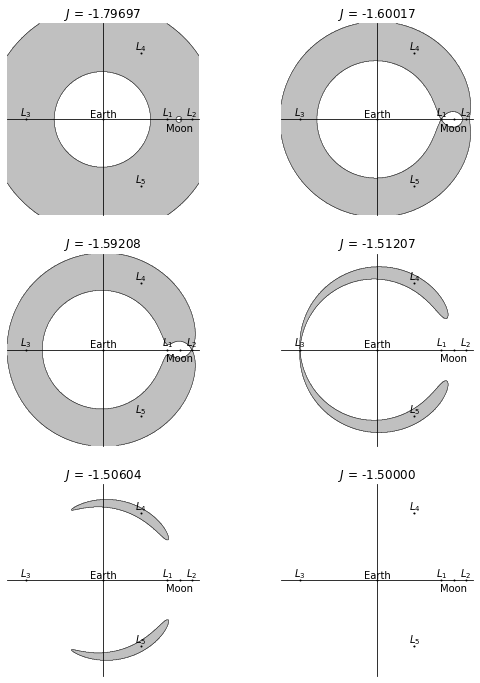

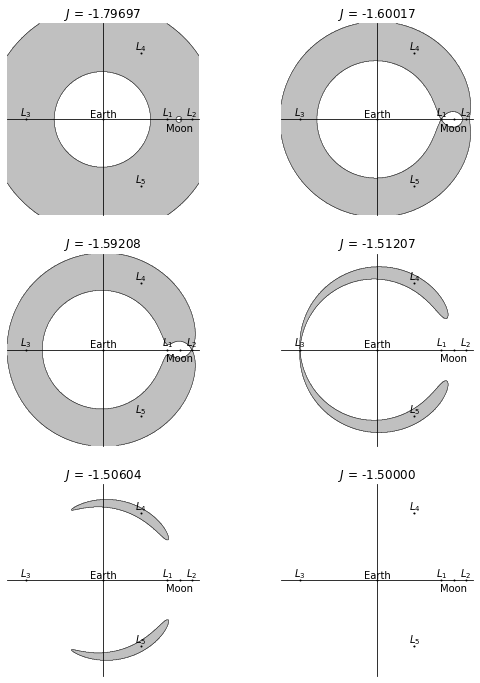

In [1]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

# These masses represent the Earth-Moon system
m_1 = 5.974E24  # kg
m_2 = 7.348E22 # kg
pi_2 = m_2/(m_1 + m_2)

x_1, y_1 = -pi_2 + 0.01, 0
x_2, y_2 = 1 - pi_2 + 0.01, 0

sigma_m1 = np.sqrt((x_1 + pi_2)**2 + y_1**2)
psi_m1 = np.sqrt((x_1 - 1 + pi_2)**2 + y_1**2)
J_m1 = -(1 - pi_2) / sigma_m1 - pi_2 / psi_m1 - ((1 - pi_2) * sigma_m1**2 + pi_2 * psi_m1**2) / 2

sigma_m2 = np.sqrt((x_2 + pi_2)**2 + y_2**2)
psi_m2 = np.sqrt((x_2 - 1 + pi_2)**2 + y_2**2)
J_m2 = -(1 - pi_2) / sigma_m2 - pi_2 / psi_m2 - ((1 - pi_2) * sigma_m2**2 + pi_2 * psi_m2**2) / 2

x_L4, y_L4 = 0.5 - pi_2, np.sqrt(3)/2

sigma_L4 = np.sqrt((x_L4 + pi_2)**2 + y_L4**2)
psi_L4 = np.sqrt((x_L4 - 1 + pi_2)**2 + y_L4**2)
J_4 = -(1 - pi_2) / sigma_L4 - pi_2 / psi_L4 - ((1 - pi_2) * sigma_L4**2 + pi_2 * psi_L4**2) / 2


def collinear_lagrange(xstar, pi_2):
    return xstar - (1 - pi_2)/np.abs(xstar + pi_2)**3 * (xstar + pi_2) - pi_2 / np.abs(xstar - 1 + pi_2)**3 * (xstar - 1 + pi_2)

y_L1 = y_L2 = y_L3 = 0
x_L1 = newton(func=collinear_lagrange, x0=0, args=(pi_2,))
x_L2 = newton(func=collinear_lagrange, x0=1, args=(pi_2,))
x_L3 = newton(func=collinear_lagrange, x0=-1, args=(pi_2,))

sigma_L1 = np.sqrt((x_L1 + pi_2)**2 + y_L1**2)
psi_L1 = np.sqrt((x_L1 - 1 + pi_2)**2 + y_L1**2)
J_1 = -(1 - pi_2) / sigma_L1 - pi_2 / psi_L1 - ((1 - pi_2) * sigma_L1**2 + pi_2 * psi_L1**2) / 2

sigma_L2 = np.sqrt((x_L2 + pi_2)**2 + y_L2**2)
psi_L2 = np.sqrt((x_L2 - 1 + pi_2)**2 + y_L2**2)
J_2 = -(1 - pi_2) / sigma_L2 - pi_2 / psi_L2 - ((1 - pi_2) * sigma_L2**2 + pi_2 * psi_L2**2) / 2

sigma_L3 = np.sqrt((x_L3 + pi_2)**2 + y_L3**2)
psi_L3 = np.sqrt((x_L3 - 1 + pi_2)**2 + y_L3**2)
J_3 = -(1 - pi_2) / sigma_L3 - pi_2 / psi_L3 - ((1 - pi_2) * sigma_L3**2 + pi_2 * psi_L3**2) / 2

fixed_points = ((x_1, x_2, x_L1, x_L2, x_L3, x_L4, x_L4), (y_1, y_2, y_L1, y_L2, y_L3, y_L4, -y_L4))
fixed_labels = ("Earth", "Moon", "$L_1$", "$L_2$", "$L_3$", "$L_4$", "$L_5$")

x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25

n_samples = 1000
x = np.linspace(x_min, x_max, n_samples)
y = np.linspace(y_min, y_max, int(n_samples / 2))
X, Y = np.meshgrid(x, y)
sigma = np.sqrt((X + pi_2)**2 + Y**2)
psi = np.sqrt((X - 1 + pi_2)**2 + Y**2)

J_values = (J_m2 + 0.9, J_1, J_2, J_3, (J_3 + J_4) / 2, J_4-1e-6)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 12))
for (J, ax) in zip(J_values, axes.flatten()):
    ax.set_aspect("equal")
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_tick_params(bottom=False, top=False, which="both", labelbottom=False)
    ax.yaxis.set_tick_params(left=False, right=False, which="both", labelleft=False)

    # Move remaining spines to the center
    ax.spines["bottom"].set_position("zero")  # spine for xaxis
    ax.spines["left"].set_position("zero")  # spine for yaxis

    for (x, y, label) in zip(fixed_points[0], fixed_points[1], fixed_labels):
        va = "bottom"
        if label == "Moon":
            va = "top"
            y -= 0.05
        ax.annotate(label, xy=(x, y), ha="center", va=va)

    ax.set_title(f"$J$ = {J:.5F}")
    ax.plot(fixed_points[0], fixed_points[1], 'ko', markersize=1)
    U = 2*(1 - pi_2) / sigma + 2* pi_2 / psi + ((1 - pi_2) * sigma**2 + pi_2 * psi**2) + 2*J
    V = np.zeros_like(U)
    V[U < 0] = 1

    cs = ax.contourf(X, Y, V, levels=[0, 0.5, 1], colors=('w', 'silver'))
    cs = ax.contour(X, Y, V, levels=[0, 0.5, 1], colors=('w', 'black'), linewidths=0.5)
glue("jacobi-forbidden-regions", fig, display=False)

:::{glue:figure} jacobi-forbidden-regions
:name: fig:jacobi-forbidden-regions

The forbidden regions in the Earth-Moon system, for varying values of the Jacobi constant, $J$.
:::

At a given instant, assume that the position and and velocity of the satellite are known, such that $J$ can be calculated. {numref}`fig:jacobi-forbidden-regions` tells us what regions of space a satellite can access purely by exchanging kinetic and potential energy.

One example of a use for these data is to determine whether or not a spacecraft can complete a [**free return trajectory**](https://en.wikipedia.org/wiki/Free-return_trajectory) from the moon back to Earth. A free return trajectory requires no additional propulsion. Depending on the exact trajectory, the return can result in the spacecraft entering Earth's atmosphere for a safe landing, as was done in the _Apollo 13_ mission.

Imagine a spacecraft in orbit around the moon. The spacecraft has $J =$ -1.797, corresponding to the upper left axis in {numref}`fig:jacobi-forbidden-regions`. With this value of $J$, the spacecraft cannot leave orbit around the moon, because it does not have enough energy to enter any of the gray areas.

Now, imagine the same spacecraft has $J =$ -1.592. If the spacecraft is at the same position as before, its speed will have increased. This gives the spacecraft access to more of the space between the earth and the moon. Now, if the spacecraft has the right initial position and speed for it, there is a possible trajectory that connects the moon and the earth.

As $J$ increases, more and more of the space between the earth and the moon becomes accessible to the spacecraft. Although the Jacobi constant cannot tell us what initial conditions are required for a given trajectory, it can tell us whether or not a given set of initial conditions will be able to get us where we want to go.